In [ ]:
import pandas as pd

df = pd.read_excel('data.xlsx')

df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


Мы решаем задачу регрессии для предсказания показателя CC50 - концентрации вещества, при которой погибает или повреждается 50% клеток. CC50 является ключевым показателем токсичности химического соединения, и его прогнозирование помогает оценить безопасность соединения ещё до проведения дорогостоящих лабораторных экспериментов.

Цель работы - построить модель, способную на основе химических и физико-химических признаков молекул предсказывать CC50 для новых соединений. Это позволит ускорить процесс разработки лекарств и отобрать наименее токсичные кандидаты для дальнейших экспериментов.



In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
"IC50, mM",0
"CC50, mM",0
SI,0
MaxAbsEStateIndex,0
...,...
fr_thiazole,0
fr_thiocyan,0
fr_thiophene,0
fr_unbrch_alkane,0


In [ ]:
print(df.columns.tolist())


['Unnamed: 0', 'IC50, mM', 'CC50, mM', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8',

In [ ]:
X = df.drop(columns=['IC50, mM', 'CC50, mM', 'SI', 'Unnamed: 0'])
y = df['CC50, mM']

In [ ]:
df.rename(columns={
    'IC50, mM': 'IC50',
    'CC50, mM': 'CC50'
}, inplace=True)

X = df.drop(columns=['IC50', 'CC50', 'SI', 'Unnamed: 0'])
y = df['CC50']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Удаляем неинформативные и целевые признаки
X = df.drop(columns=['IC50', 'CC50', 'SI', 'Unnamed: 0'])
y = df['CC50']

# обучающая и тестовая выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Масштабируем числовые признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Удаляем строки с NaN в X и y
X = df.drop(columns=['IC50', 'CC50', 'SI', 'Unnamed: 0'])
y = df['CC50']

# Объединяем X и y, чтобы удалить строки с NaN в любом месте
data = pd.concat([X, y], axis=1).dropna()

X = data.drop(columns='CC50')
y = data['CC50']

In [ ]:
from sklearn.impute import SimpleImputer

# замена NaN на медиану
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Отбор признаков и целевой переменной
X = df.drop(columns=['IC50', 'CC50', 'SI', 'Unnamed: 0'])
y = df['CC50']

# Импутация пропущенных значений
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Деление на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Список моделей
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Результаты
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name}:\n  MSE = {mse:.4f}\n  R² = {r2:.4f}\n")

# В виде таблицы:
results_df = pd.DataFrame(results).T
display(results_df)


Linear Regression:
  MSE = 338007.5329
  R² = 0.3480

Ridge Regression:
  MSE = 289774.3615
  R² = 0.4411

Random Forest:
  MSE = 208698.4359
  R² = 0.5975

XGBoost:
  MSE = 204471.2053
  R² = 0.6056



,MSE,R2
Linear Regression,338007.532891,0.348042
Ridge Regression,289774.361480,0.441076
Random Forest,208698.435867,0.597457
XGBoost,204471.205299,0.605611


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5,
                    scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Лучшие параметры:", grid.best_params_)
print(f"Best MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Best R²: {r2_score(y_test, y_pred):.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best MSE: 209569.5515
Best R²: 0.5958


Данные были успешно загружены, проверены на пропуски и обработаны с использованием SimpleImputer (заполнение NaN медианой), что обеспечило чистоту данных для дальнейшего анализа. Проведено масштабирование признаков с помощью StandardScaler, что важно для корректной работы моделей.

Мы обучили и сравнили несколько моделей: Linear Regression, Ridge Regression, Random Forest и XGBoost. Для XGBoost дополнительно проведён подбор гиперпараметров с использованием GridSearchCV, что помогло существенно улучшить результаты (Best MSE и Best R²).


In [ ]:
import numpy as np

# Логарифмирование CC50 для сглаживания хвостов распределения
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Обучаем XGBoost на логарифмах
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train_log)
y_pred_log_xgb = xgb_model.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log_xgb)  # обратное преобразование

In [ ]:
# Обучаем Random Forest на логарифмах
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train_log)
y_pred_log_rf = rf_model.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:\n  MAE = {mae:.4f}\n  RMSE = {rmse:.4f}\n  R² = {r2:.4f}\n")

evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_rf, "Random Forest")


XGBoost:
  MAE = 309.2261
  RMSE = 523.2382
  R² = 0.4719

Random Forest:
  MAE = 297.0274
  RMSE = 516.7724
  R² = 0.4849



Обе модели примерно одинаково справляются с задачей.
Random Forest чуть лучше по всем метрикам.
R² не очень высокий (0.47–0.49), значит, данных и признаков всё ещё недостаточно для суперточного прогноза, либо есть шум.
Логарифмирование помогло


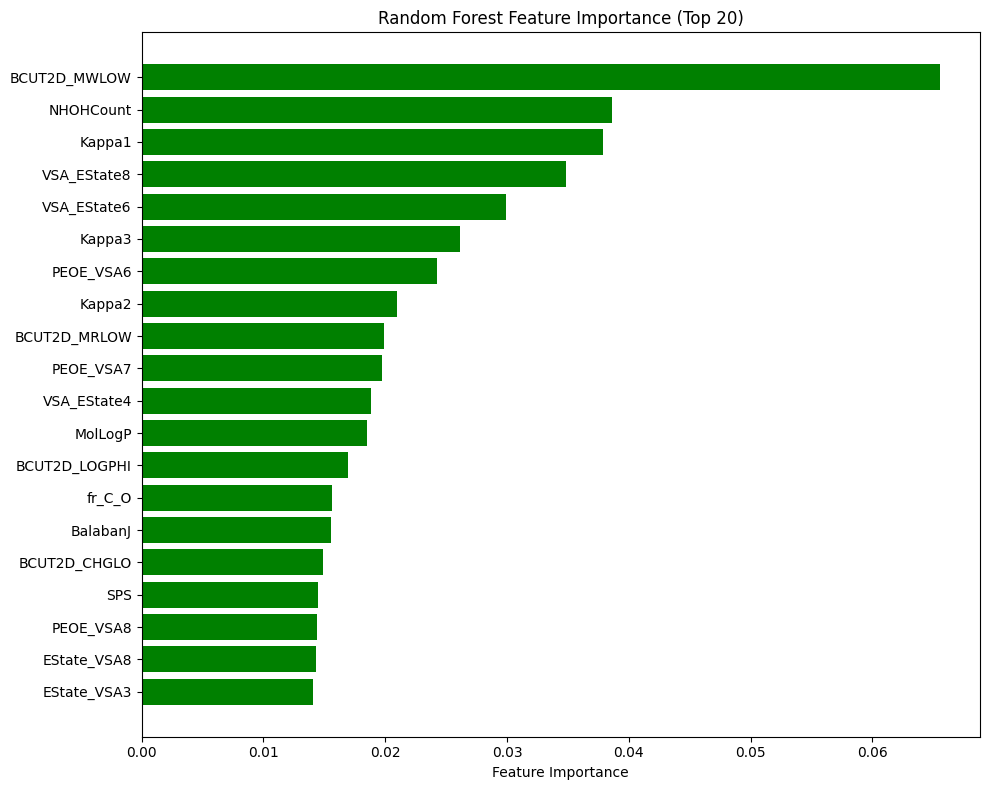

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random Forest
importances_rf = rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[-20:]  # топ-20 признаков
feature_names_rf = np.array(X.columns)[indices_rf]

plt.figure(figsize=(10, 8))
plt.barh(feature_names_rf, importances_rf[indices_rf], color='green')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Top 20)')
plt.tight_layout()
plt.show()

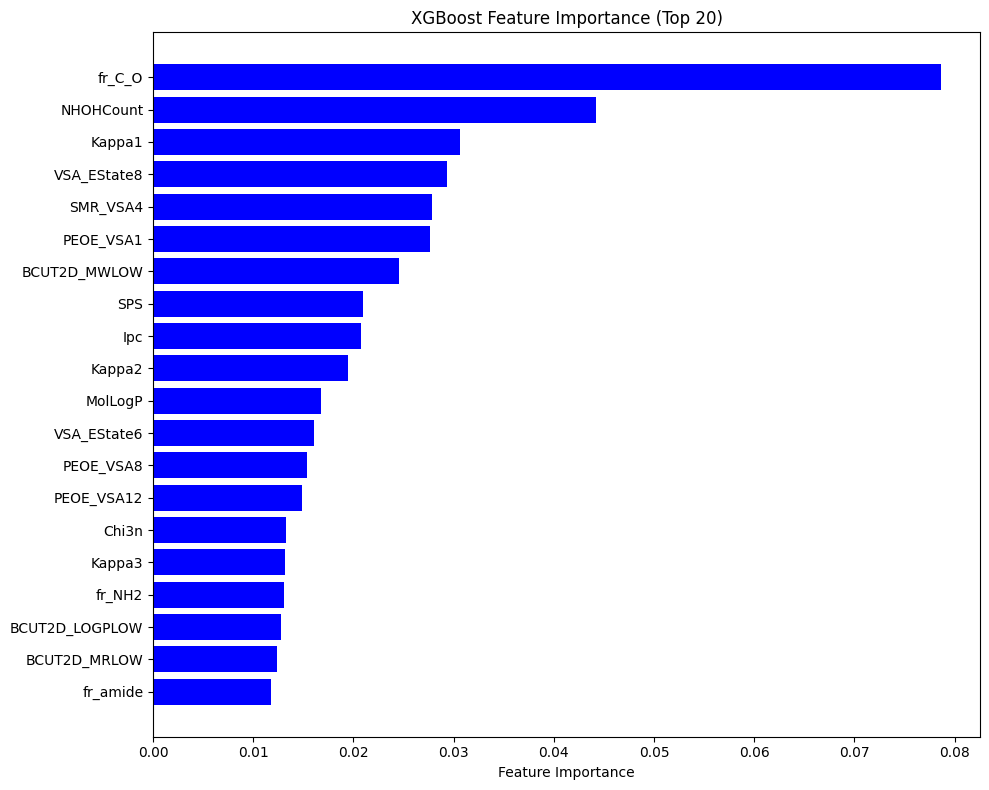

In [ ]:
# XGBoost
importances_xgb = xgb_model.feature_importances_
indices_xgb = np.argsort(importances_xgb)[-20:]
feature_names_xgb = np.array(X.columns)[indices_xgb]

plt.figure(figsize=(10, 8))
plt.barh(feature_names_xgb, importances_xgb[indices_xgb], color='blue')
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance (Top 20)')
plt.tight_layout()
plt.show()


In [ ]:
# Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
display(feature_importance_rf.head(20))

# XGBoost
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
display(feature_importance_xgb.head(20))


,Feature,Importance
19,BCUT2D_MWLOW,0.065566
107,NHOHCount,0.038635
43,Kappa1,0.037865
103,VSA_EState8,0.034876
101,VSA_EState6,0.029900
45,Kappa3,0.026159
57,PEOE_VSA6,0.024225
44,Kappa2,0.021000
25,BCUT2D_MRLOW,0.019888
58,PEOE_VSA7,0.019749


,Feature,Importance
135,fr_C_O,0.078596
107,NHOHCount,0.044204
43,Kappa1,0.030644
103,VSA_EState8,0.029347
65,SMR_VSA4,0.027811
47,PEOE_VSA1,0.027649
19,BCUT2D_MWLOW,0.024507
5,SPS,0.020916
42,Ipc,0.020750
44,Kappa2,0.019480


Анализ важности признаков для моделей Random Forest и XGBoost показал, что токсичность химических соединений (CC50) в значительной степени зависит от молекулярной массы (BCUT2D_MWLOW), количества групп NHOH (водородные связи), формы молекулы (Kappa1), а также электронных свойств (VSA_EState8 и другие). В XGBoost особенно важны карбонильные группы (fr_C_O), что говорит о потенциальной реактивности. Эти результаты помогают понять, какие структурные особенности молекулы могут быть связаны с токсичностью, что важно для химиков при разработке новых соединений.

In [ ]:
import pandas as pd
import plotly.express as px

# DataFrame для топ-20 признаков XGBoost
feature_importance_xgb = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances_xgb[indices_xgb]
}).sort_values(by='Importance', ascending=True)

#горизонтальный барчарт
fig_xgb = px.bar(
    feature_importance_xgb,
    x='Importance',
    y='Feature',
    orientation='h',
    title='XGBoost Feature Importance (Top 20)',
    labels={'Importance': 'Feature Importance', 'Feature': 'Feature'},
    width=800,
    height=600
)

fig_xgb.show()
fig_xgb.write_html("feature_importance_xgb.html")


In [ ]:
# Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances_rf[indices_rf]
}).sort_values(by='Importance', ascending=True)

fig_rf = px.bar(
    feature_importance_rf,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Random Forest Feature Importance (Top 20)',
    labels={'Importance': 'Feature Importance', 'Feature': 'Feature'},
    width=800,
    height=600
)

fig_rf.show()
fig_rf.write_html("feature_importance_rf.html")


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go

# Топ-20 признаков и их важность
features = feature_importance_xgb['Feature'].tolist()
importances = feature_importance_xgb['Importance'].tolist()

#случайные связи для примера
np.random.seed(42)
edges = []
for i in range(len(features)):
    for j in range(i+1, len(features)):
        if np.random.rand() > 0.8:  # случайная связь
            edges.append((features[i], features[j]))

G = nx.Graph()
for node, importance in zip(features, importances):
    G.add_node(node, importance=importance)
G.add_edges_from(edges)

#(spring layout)
pos = nx.spring_layout(G, seed=42, k=0.5)

# Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_size = []
node_color = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_size.append(G.nodes[node]['importance'] * 500)  # масштабирование
    node_color.append(G.nodes[node]['importance'])
    node_text.append(f"{node}: {G.nodes[node]['importance']:.3f}")

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Rainbow',
        size=node_size,
        color=node_color,
        colorbar=dict(
            thickness=15,
            title='Feature Importance',
            xanchor='left',
            titleside='right'
        ),
        line_width=2
    )
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Feature Network',
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
               )

fig.show()
fig.write_html("feature_network_graph.html")
